## Exercise 05 : Boxplot

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/ab-test.csv')
df

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


In [3]:
after = df[df['time'] == 'after']
before = df[df['time'] == 'before']

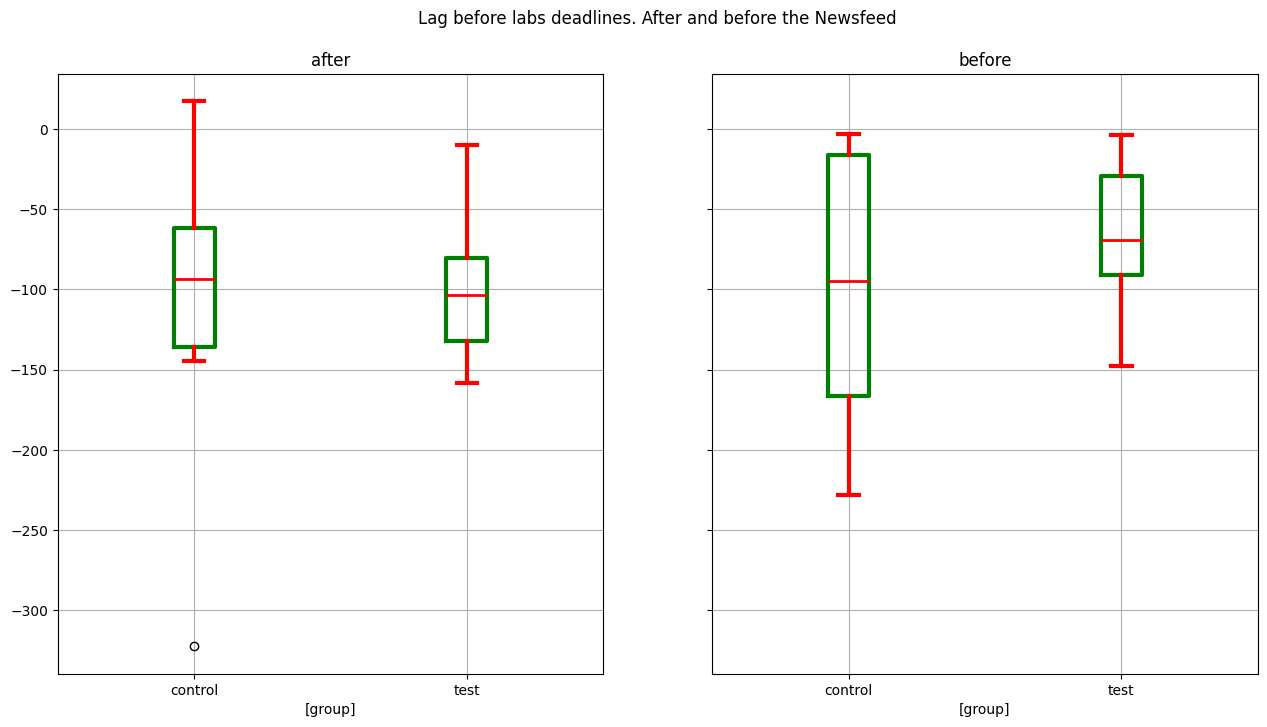

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

after.boxplot(
    column='diff', by='group', ax=axes[0],
    boxprops=dict(color='green', linewidth=3),
    whiskerprops=dict(color='red', linewidth=3),
    capprops=dict(color='red', linewidth=3),
    medianprops=dict(color='red', linewidth=2),
              )
axes[0].set_title('after')
axes[0].set_xlabel('[group]')

before.boxplot(
    column='diff', by='group', ax=axes[1],
    boxprops=dict(color='green', linewidth=3),
    whiskerprops=dict(color='red', linewidth=3),
    capprops=dict(color='red', linewidth=3),
    medianprops=dict(color='red', linewidth=2),
               )
axes[1].set_title('before')
axes[1].set_xlabel('[group]')

plt.suptitle('Lag before labs deadlines. After and before the Newsfeed')
plt.show()

## Каков был IQR контрольной группы до появления новостей?

In [5]:
before[before['group'] == 'control']

,uid,diff,time,group
15,user_12,-103.0,before,control
17,user_13,-15.5,before,control
19,user_15,-3.0,before,control
21,user_16,-153.0,before,control
23,user_2,-202.0,before,control
25,user_20,-16.0,before,control
27,user_22,-156.0,before,control
29,user_24,-75.0,before,control
31,user_26,-40.0,before,control
33,user_27,-3.5,before,control


In [6]:
q1 = before[before['group'] == 'control']['diff'].quantile(0.25)
q3 = before[before['group'] == 'test']['diff'].quantile(0.75)
iqr = q3 - q1
iqr

np.float64(136.75)

### Если визуально определять по графику, то значение ~ -150